# Seminar 1. Naive Bayes & kNN

## Packages

[scikit-learn](https://scikit-learn.org/stable/) implements most of classical and frequently used algorithms in Machine Learning. 

Also, it provides [User Guide](https://scikit-learn.org/stable/user_guide.html) that is describing principles of implemented algoritms.

[NumPy](https://numpy.org) contains multidimensional array data structures, such as the homogeneous, N-dimensional ndarray, and a large library of functions that operate efficiently on these data structures.

[Pandas](https://pandas.pydata.org) is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.

[Matplotlib](https://matplotlib.org) is a comprehensive library for creating static, animated, and interactive visualizations in Python

In [35]:
import pandas
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

To downgrade the version of `numpy`, if there is `ValueError: numpy.dtype size changed, ...`

``` 
pip install numpy==1.26.4
```

**Scikit-learn isn’t commonly used in production** because:

- Performance & Scalability: It’s not optimized for large datasets, lacks GPU support, and doesn’t handle real-time or distributed computing wel

- No Deep Learning: It doesn’t support neural networks like TensorFlow or PyTorch

## Dataset

[The Iris Dataset](https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html) consists of 3 different types of irises (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The object generated by `load_iris` is an dictionary-like object containes the following interesting attributes:

> `data`, the data to learn,
>
> `target`, the classification labels,
>
> `target_names`, the meaning of the labels,
>
> `feature_names`, the meaning of the features,
> 
> `filename`, the physical location of iris csv dataset (added in version 0.20) 
>
> `DESCR`, the full description of the dataset,

In [36]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [37]:
df_iris = pandas.DataFrame(
    data=iris.data, 
    columns=iris.feature_names
)

df_iris['target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
df_iris["target"].unique()

array([0, 1, 2])

### Questions

<details>
    <summary>What are the key components of a well-defined Machine Learning problem statement?</summary>
    
- **Objective**: Clearly define the goal of the ML model. What are you trying to predict or optimize?
- **Input Data (Features)**: Specify the data available for training, including feature types and sources
- **Output (Target Variable)**: Define what the model needs to predict (for supervised learning problems)
- **Type of Learning**: Identify whether the problem is supervised or unsupervised
- **Evaluation Metric**: Define how the model’s performance will be measured (e.g., accuracy, RMSE, F1-score)
- **Constraints and Assumptions**: Consider any limitations such as data availability, computational resources, or interpretability requirements
    
</details>

<details>
    <summary>What types of features could exist in a tabular dataset?</summary>
    
Two of the most important types are:
    
**Numerical Features**. These features represent measurable quantities and can be further divided into:

- Continuous: Can take any real value within a range (e.g., height, weight, temperature)
- Discrete: Take only specific values, often integers (e.g., number of children, number of purchases)
    
**Categorical (Qualitative) Features**. These represent categories or labels and can be divided into:
    
- Nominal: No inherent order (e.g., color: red, blue, green)
- Ordinal: Have a meaningful order but no fixed interval (e.g., education level: high school, bachelor's, master's)
    
</details>

<details>
    <summary>What are the differences between supervised and unsupervised learning?</summary>
    
**Supervised Learning** works with labeled data and aims to learn a direct relationship between input and output.
    
**Unsupervised Learning** works with unlabeled data and focuses on finding hidden structures or groupings.
    
</details>

<details>
    <summary>How do you decide whether a problem should be solved using Regression or Classification?</summary>
    
The choice between Regression and Classification depends on the nature of the target variable (output):
    
**Regression**: The target variable is continuous (numerical) and can take infinite values within a range.
    
**Classification**: The target variable is categorical (discrete labels) and belongs to predefined classes.
    
</details>

<details>
    <summary>If the goal is to predict the number of stars for a film rating (e.g., 1 to 5 stars), which approach is more suitable: Regression or Classification? </summary>
    
If the rating system is strictly whole numbers (1-5) and we care about ranking but not intermediate values, **Classification** is preferable.
    
If the ratings are averages (e.g., IMDb's 7.3 out of 10), **Regression** is more suitable.
</details>

## Naive Bayes

### Bayes' theorem

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$, where $A$ and $B$ are events and $P(B) \neq 0$

<details>
    <summary>What conditional propability do we want to estimate in our case? What are events $A$ and $B$?</summary>
    
    We want to estimate the conditional probability of some class occurring given some observation/object.
    
</details>

### Classifier

Let's $x = (x_1, \dots x_N)$ is an observation/ object, $C = \{C_1, \dots, C_K\}$ is a set of classes.

$P(C_k|x) = \frac{P(x|C_k)P(C_k)}{P(x)}$

<details>
    <summary>What part of this fraction are we interested in in practice? What part can we neglect? Why?</summary>
    In practice, there is interest only in the numerator of that fraction, because the denominator does not depend on C and the values of the features are given, so that the denominator is effectively contrast.
</details>

$P(C_k|x) \varpropto P(x|C_k)P(C_k) = P(x_1, \dots x_N|C_k)P(C_k) = P(x_1|x_2, \dots x_N, C_k)P(x_2, \dots x_N|C_k)P(C_k) = \dots = $

$P(x_1|x_2, \dots x_N, C_k)P(x_2|x_3, \dots x_N, C_k) \dots P(x_{N-1}|x_N, C_k)P(x_N|C_k)P(C_k)$

<details>
    <summary>What assumption in the Naive Bayes approach do we use at this stage to simplify the calculations? </summary>
    Now the "naive" conditional independence assume that all features in x are mutually independent, conditional on the class. 
</details>

Under this assumption $P(x_n|x_{n+1}, \dots x_N, C_k) = P(x_n|C_k)$

$P(C_k|x) \varpropto P(C_k) \prod_{n=1}^N P(x_n|C_k)$

The corresponding classifier, a Bayes classifier, is the functon that assigns a class label $\hat{y} = C_k$ for some $k$ as follows:

$\hat{y} = \arg\max\limits_{k \in \{1, \dots K\}} P(C_k) \prod_{n=1}^N P(x_n|C_k)$

$\hat{y} = \arg\max\limits_{k \in \{1, \dots K\}} [\log P(C_k) + \sum_{n=1}^N \log P(x_n|C_k)]$

Please note, that making computations with log probabilities is more stable.

### Gaussian Naive Bayes

Since we aiming to implement Naive Bayes algorithm first we need some prior distribution defined.

<details>
    <summary>What assumption do we make in this step?</summary>
    When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.
</details>

Denote the normal (or Gaussian) distribution $\mathcal{N}(\mu, \sigma^2)$:
$$
f(x|\mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x - \mu)^2}{2\sigma^2})
$$

In [39]:
class GaussianDistribution:
    def __init__(self, feature):
        """
        feature: column of design matrix, represents all available values of feature to model.
        """
        self.mean = feature.mean(axis=0)
        self.std = feature.std(axis=0)

    def logpdf(self, value):
        """Logarithm of probability density at value"""
        return -0.5 * np.log(2.0 * np.pi * self.std**2) - (value - self.mean) ** 2 / (
            2 * self.std**2
        )

    def pdf(self, value):
        return np.exp(self.logpdf(value))

In [40]:
# class NaiveBayes(BaseEstimator, ClassifierMixin):
    # ...

<details>
    <summary>Which methods do class NaiveBayes need to contain?</summary>
    
```python
    
class NaiveBayes(BaseEstimator, ClassifierMixin):
    
    def fit(self, X, y, distribution=None):
        ...
        
    def predict_log_proba(self, X):
        ...
        return class_log_probas
    
    def predict_proba(self, X):
        return np.exp(self.predict_log_proba(X))
    
    def predict(self, X):
        log_probas = self.predict_log_proba(X)
        return np.array([self.classes_[index] for index in log_probas.argmax(axis=1)])
```  
</details>

<details>
    <summary>Which parametars do we need to train?</summary>
    
```python

for cl in self.classes_:
    
    feature_distributions = []
    for index in range(self.n_features_):
        features = X[y == cl, index]
        fitted_distribution = distribution(features)
        feature_distributions.append(fitted_distribution)
        self.conditional_feature_distributions[cl] = feature_distributions
            
    self.prior_class_distribution = {
        cl: sum(y == cl) / len(y) for cl in self.classes_
    }

```
</details>

In [41]:
from scipy.special import logsumexp
from sklearn.base import BaseEstimator, ClassifierMixin

class NaiveBayes(BaseEstimator, ClassifierMixin):
    
    def fit(self, X, y, distribution=None):
        self.classes_ = np.unique(y)
        _, self.n_features_ = X.shape
        
        if distribution is None:
            distribution = GaussianDistribution
            
        self.conditional_feature_distributions = dict()
        
        for cl in self.classes_:
            feature_distributions = []
            for index in range(self.n_features_):
                features = X[y == cl, index]
                fitted_distribution = distribution(features)
                feature_distributions.append(fitted_distribution)
            self.conditional_feature_distributions[cl] = feature_distributions
            
        self.prior_class_distribution = {
            cl: sum(y == cl) / len(y) for cl in self.classes_
        }
        
    def predict_log_proba(self, X):
        class_log_probas = np.zeros((len(X), len(self.classes_)), dtype=float)
        
        for cl_index, cl in enumerate(self.classes_):
            for index in range(self.n_features_):
                class_log_probas[:, cl_index] += self.conditional_feature_distributions[cl][index].logpdf(X[:, index])
                
            class_log_probas[:, cl_index] += np.log(self.prior_class_distribution[cl])
                
        return class_log_probas
    
    def predict_proba(self, X):
        return np.exp(self.predict_log_proba(X))
    
    def predict(self, X):
        log_probas = self.predict_log_proba(X)
        return np.array([self.classes_[index] for index in log_probas.argmax(axis=1)])

<details>
    <summary>Can we use different distributions for features?</summary>
    Yes, we can because there is assumption that all features are independent.
</details>

<details>
    <summary>How do we need to change our class for providing the option to use different distributions for features?</summary>

```python

class NaiveBayes(BaseEstimator, ClassifierMixin):

    def fit(self, X, y, distributions=None):
        ...
        
        if distributions is None:
                distributions = self.n_features_ * [GaussianDistribution]
        else:
            assert len(distributions) == self.n_features_
            
        for cl in self.classes_:
            feature_distributions = []
            for index in range(self.n_features_):
                features = X[y == cl, index]
                fitted_distribution = distributions[index](features)
                ...
```
</details>

When the option to use different distributions for features can be usefull?

In [42]:
feature_names = [
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)'
]

X = df_iris[feature_names].to_numpy()
y = df_iris['target']

In [43]:
nb_classifier = NaiveBayes()

nb_classifier.fit(X, y)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape, X_test.shape)

(105, 4) (45, 4)


In [45]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

print(
    "Naive Bayes classifier accuracy on\n    the train set: {}\n    the test set: {}".format(
        nb.score(X_train, y_train),
        nb.score(X_test, y_test)
    )
)

Naive Bayes classifier accuracy on
    the train set: 0.9619047619047619
    the test set: 0.9777777777777777


<details>
    <summary>We didn't implement the method `score`! Why can we use it?</summary>

We used an inheritance, our class `NaiveBayes` inherited the method `score` from the parent class `ClassifierMixin` from [scikit-learn](https://scikit-learn.org/1.5/modules/generated/sklearn.base.ClassifierMixin.html)
</details>

In [46]:
from sklearn import naive_bayes

sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(X_train, y_train)

print(
    "Naive Bayes classifier accuracy on\n    the train set: {}\n    the test set: {}".format(
        sklearn_nb.score(X_train, y_train),
        sklearn_nb.score(X_test, y_test)
    )
)

Naive Bayes classifier accuracy on
    the train set: 0.9619047619047619
    the test set: 0.9777777777777777


In [ ]:
# nb_test_log_proba = nb.predict_log_proba(X_test)
# sklearn_nb_test_log_proba = sklearn_nb.predict_log_proba(X_test)

# assert np.allclose(nb_test_log_proba, sklearn_nb_test_log_proba), "Log probabilities do not match"

# print("Seems alright!")

AssertionError: Log probabilities do not match

In [48]:
nb_test_log_proba[:3]

array([[  -2.23744225,  -53.51524189,  -57.98125554],
       [-147.4268269 ,   -2.75078982,  -10.4001108 ],
       [-120.68298716,   -2.90922051,  -13.35312685]])

In [49]:
nb.predict_proba(X_test)[:3]

array([[1.06731147e-01, 5.73621933e-24, 6.59265979e-26],
       [9.40464905e-65, 6.38773899e-02, 3.04291112e-05],
       [3.87297432e-53, 5.45182099e-02, 1.58785446e-06]])

In [50]:
sklearn_nb.predict_proba(X_test)[:3]

array([[1.00000000e+00, 5.37446753e-23, 6.17689337e-25],
       [1.47163435e-63, 9.99523859e-01, 4.76140741e-04],
       [7.10391758e-52, 9.99970876e-01, 2.91243725e-05]])

<details>
    <summary>Why didn't we get the probability values?</summary>
    Because we neglected by evidence!
</details>

As one could mention, to find the class label with the highest probability we even do not need the last term $P(x)$. 

However, we need it to get the correct estimation of the probability $P(C_k|x)$. The $P(x)$ term can be computed using the following property:
$$
P(x) = \sum_{k=1}^K P(x|C_k)P(C_k)
$$

$\hat{y} = \arg\max\limits_{k \in \{1, \dots K\}} [\log P(C_k) + \sum_{n=1}^N \log P(x_n|C_k) - \log P(x)]$

It can be computed from $\log P(x|C_k)$ values using `logsumexp` function located in `scipy.special`.

In [51]:
from scipy.special import logsumexp

class FixedNaiveBayes(NaiveBayes):
    def predict_log_proba(self, X):
        class_log_probas = np.zeros((len(X), len(self.classes_)), dtype=float)
        
        for cl_index, cl in enumerate(self.classes_):
            for index in range(self.n_features_):
                class_log_probas[:, cl_index] += self.conditional_feature_distributions[cl][index].logpdf(X[:, index])
                
            class_log_probas[:, cl_index] += np.log(self.prior_class_distribution[cl])
        
        # If you want to get probabilities, you need to substract the log proba for every feature
        for index in range(self.n_features_):
            class_log_probas -= logsumexp(class_log_probas, axis=1)[:, None]
                
        return class_log_probas

In [52]:
fixed_nb = FixedNaiveBayes()
fixed_nb.fit(X_train, y_train)

nb_test_log_proba = fixed_nb.predict_log_proba(X_test)
sklearn_nb_test_log_proba = sklearn_nb.predict_log_proba(X_test)

assert np.allclose(nb_test_log_proba, sklearn_nb_test_log_proba), "log probabilities do not match"

print("Seems alright!")

Seems alright!


### Categorical Naive Bayes

In [53]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discrete_data = discretizer.fit_transform(iris.data)

In [54]:
discrete_df_iris = pandas.DataFrame(
    data=discrete_data, 
    columns=iris.feature_names
)

discrete_df_iris['target'] = iris.target
discrete_df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,1.0,3.0,0.0,0.0,0
1,0.0,2.0,0.0,0.0,0
2,0.0,2.0,0.0,0.0,0
3,0.0,2.0,0.0,0.0,0
4,0.0,3.0,0.0,0.0,0


**Multinomial Distribution**

The multinomial distribution is a generalization of the binomial distribution to more than two possible outcomes. It describes the probabilities of different outcomes when performing multiple independent trials, where each trial can result in one of k different categories.

Given:
- A total of **n independent trials**.
- Each trial has **k possible categories**.
- Each category $i$ has a fixed probability $p_i$ (where $\sum p_i = 1$).
- The number of times category $i$ occurs is $x_i$.

The probability mass function (PMF) of the multinomial distribution is:

$$
P(X_1 = x_1, X_2 = x_2, ..., X_k = x_k) = \frac{n!}{x_1! x_2! ... x_k!} p_1^{x_1} p_2^{x_2} ... p_k^{x_k}
$$

where:
- $n!$ accounts for the total number of ways to arrange outcomes.
- $x_i!$ accounts for repetitions of each category.
- $p_i^{x_i}$ represents the probability of each specific outcome.

In [55]:
discrete_X = discrete_df_iris[feature_names].to_numpy()
y = discrete_df_iris['target']

discrete_X_train, discrete_X_test, y_train, y_test = train_test_split(discrete_X, y, test_size=0.3)

sklearn_catnb = naive_bayes.CategoricalNB()
sklearn_catnb.fit(discrete_X_train, y_train)

print(
    "Naive Bayes classifier accuracy on\n    the train set: {}\n    the test set: {}".format(
        sklearn_catnb.score(discrete_X_train, y_train),
        sklearn_catnb.score(discrete_X_test, y_test)
    )
)

Naive Bayes classifier accuracy on
    the train set: 0.9619047619047619
    the test set: 0.8444444444444444


Multinomial Naïve Bayes used in text classification, where features represent word counts in different categories.

## kNN (k Nearest Neigbors)

1. Choose the Number of Neighbors (k)
2. Compute the Distance
    - Calculate the distance between the new data point and all points in the training dataset
3. Identify the k Nearest Neighbors
    - Sort the training points by distance from the query point
    - Select the k closest points
4. Assign a Class
    - Majority voting: The most common class among the k neighbors determines the predicted class
    - Weighted voting: Closer neighbors have higher influence
4. Predict a Value (for Regression)
    - Take the average (or weighted average) of the k nearest neighbors’ values
5. Evaluate the Model
    - Use metrics like accuracy
    - Tune k to optimize performance (cross-validation helps)

In [56]:
class KNearestNeighbors(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=3):
        """
        k: Number of neighbors to consider
        """
        self.k = k
        
    def fit(self, X, y):
        ...

<details>
    <summary>How do we train kNN? What parameters do this model learn?</summary>    
</details>

In [ ]:
knn = KNearestNeighbors(n_neighbors=1)
knn.fit(X_train, y_train)


print(
    "kNN classifier accuracy on\n    the train set: {}\n    the test set: {}".format(
        knn.score(X_train, y_train),
        knn.score(X_test, y_test)
    )
)

NameError: name 'k' is not defined

<details>
    <summary>The kNN is perform better, but what advantages do the Naive Bayes have?</summary>
</details>

<details>
    <summary>Can we compute probabilities in k-NN?</summary>
</details>

<details>
    <summary>Can we use k-NN for solving Regression tasks?</summary>
</details>

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(
    "kNN classifier accuracy on\n    the train set: {}\n    the test set: {}".format(
        knn.score(X_train, y_train),
        knn.score(X_test, y_test)
    )
)

kNN classifier accuracy on
    the train set: 0.9904761904761905
    the test set: 0.28888888888888886


In [58]:
from sklearn.metrics import accuracy_score

def make_meshgrid(data: np.ndarray, step: float = 0.05, border: float = 0.5):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, X_train, y_train, X_test, y_test):
    colors = ListedColormap(["red", "blue", "yellow"])
    light_colors = ListedColormap(["lightcoral", "lightblue", "lightyellow"])
    
    knn.fit(X_train, y_train)
    
    fig = plt.figure(figsize=(16, 6))
    fig.suptitle(estimator)

    # plot decision surface on the train data
    plt.subplot(1, 2, 1)
    xx, yy = make_meshgrid(X_train)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap=colors)
    acc = accuracy_score(y_train, estimator.predict(X_train))
    plt.title(f"Train data, accuracy={acc:.2f}")

    # plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, cmap=colors)
    acc = accuracy_score(y_test, estimator.predict(X_test))
    plt.title(f"Test data, accuracy={acc:.2f}")

    plt.show()

<details>
    <summary>How do you think overfitting occurs in this case when k is 1 or 2?</summary>    
</details>

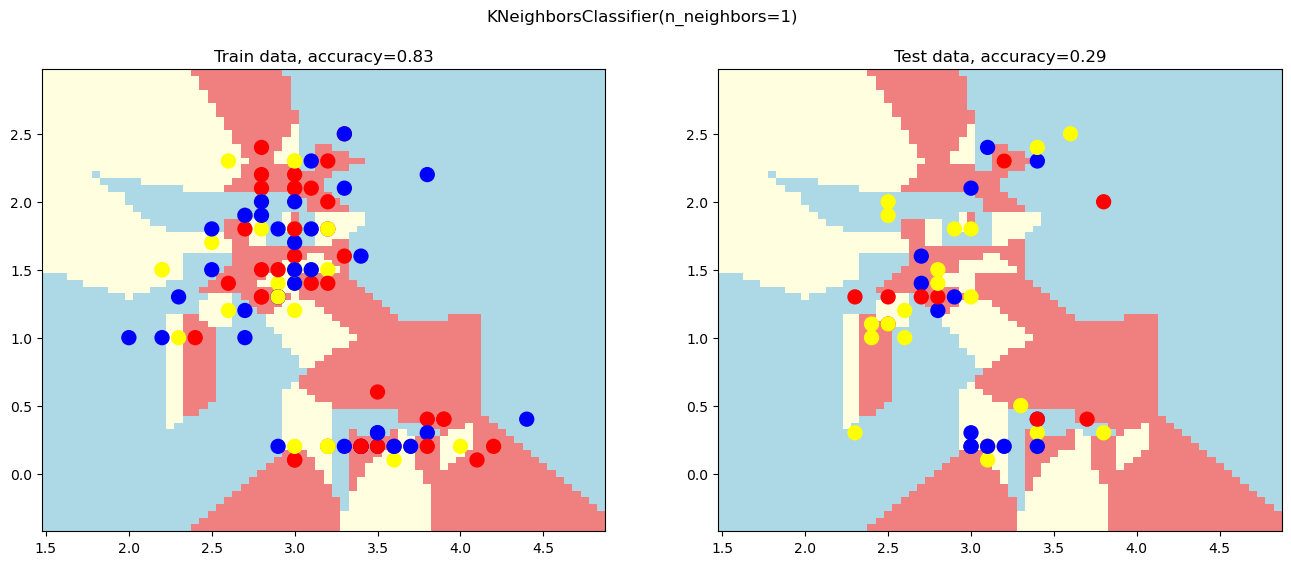

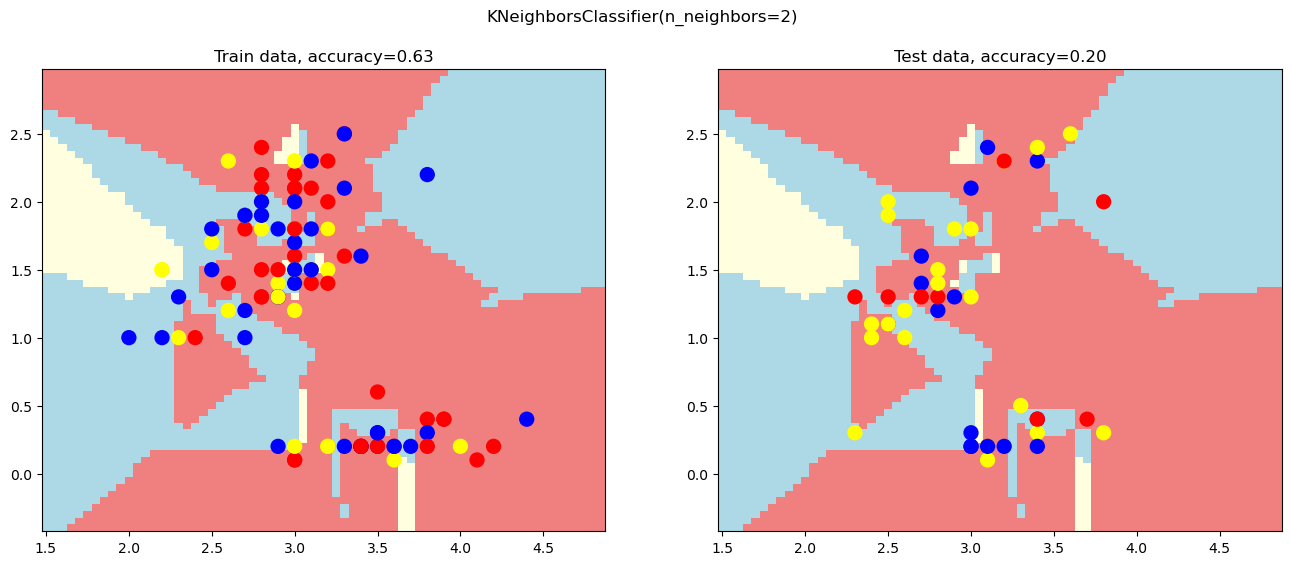

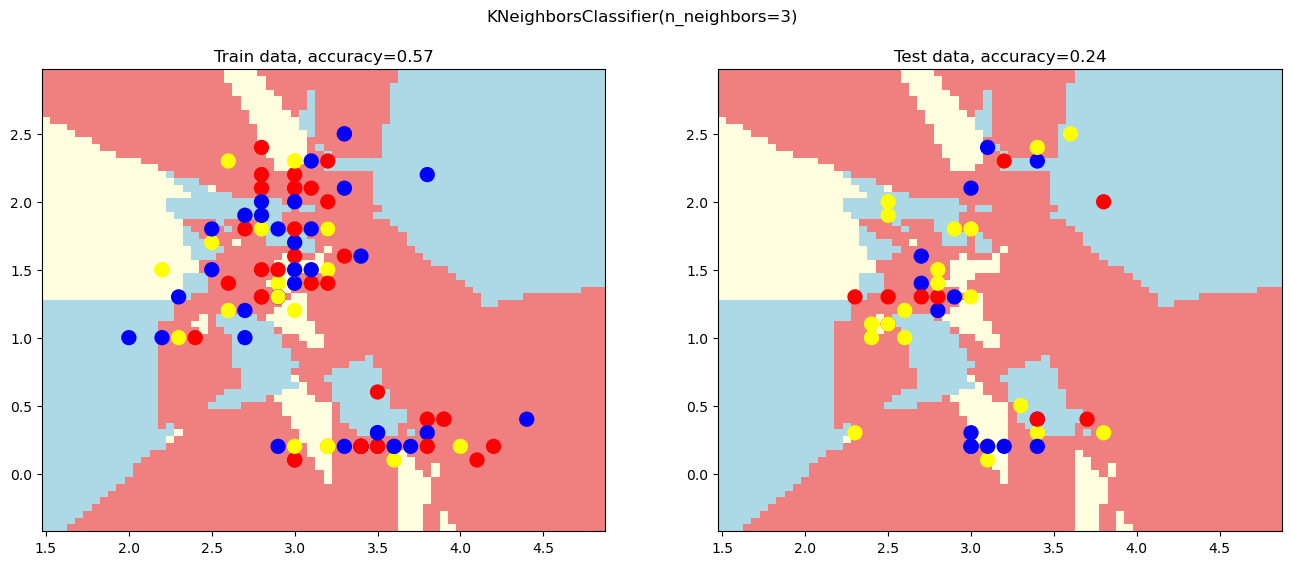

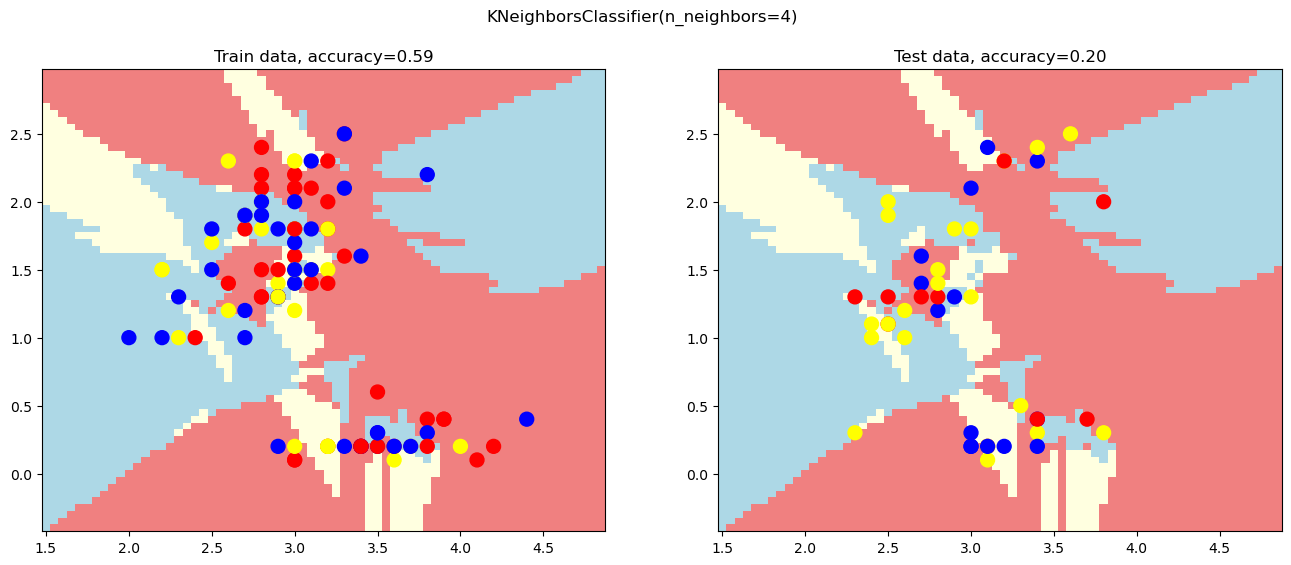

In [59]:
for n_neighbors in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    plot_decision_surface(knn, X_train[:, [1, 3]], y_train, X_test[:, [1, 3]], y_test)

## Holdout Method and Cross-Validation

**Holdout Method**: The dataset is split into two parts: training set (to train the model) and test set (to evaluate the model).

**Cross-Validation**: The dataset is split into k parts (folds). The model is trained on k-1 folds and tested on the remaining fold, repeating this process k times.

<details>
    <summary>Why might the Holdout Method give misleading results in some cases?</summary>
</details>

<details>
    <summary>When to use each?</summary>
</details>

In [60]:
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 11))
mean_accuracies = []
std_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    mean_accuracies.append(scores.mean())
    std_accuracies.append(scores.std())

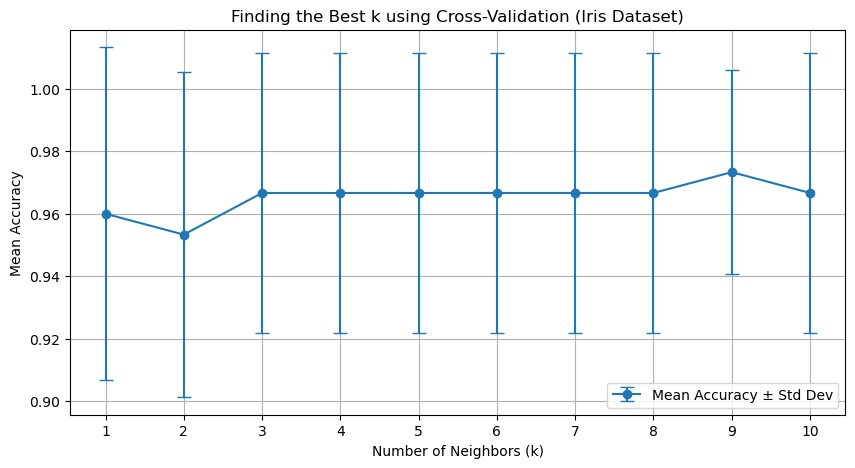

In [61]:
plt.figure(figsize=(10, 5))
plt.errorbar(k_values, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label='Mean Accuracy ± Std Dev')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('Finding the Best k using Cross-Validation (Iris Dataset)')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()